## Employee Performance Analysis

## Summary

## Key Performance Indicators of the Project

##  A.Department wise Performance.

Based on given data, I infer the deparment "Development" is the top performing team in the organisation. The distribution of performance is displayed in "Plot 1". The following list depicts the departments, as the performance goes high to low. Please refer "Plot 1"


1. Development Department(3.0)
2. Datascience  Department(4.0)
3. Research and Development(5.0)
4. Sales(1.0)
5. Human Resources(2.0)
6. Finance(6.0)


##  B. Important Factors effecting employee performance.

 1.EmpEnvironmentSatisfaction
 
 2.EmpLastSalaryHikePercent
 
 3.YearsSinceLastPromotion
 
 4.Age
 
 5.Gender
 
 6.MaritalStatus
 
 7.EmpDepartment
 
 8.EmpWorkLifeBalance
 
 9.TrainingTimesLastYear

## C. Model which can predict the employee performance based on factors.

  As the target variable is PerformanceRate, I choose the following classifier model.
  
1. Random Forest Classifier--95% Accuracy and 83,97,91---- Recall rate for 2,3,4 Performance Rate where
             2-Good Performance
             3- Excellent
             4- Outstanding 
             
2. XG Boost Classifier------95% Accuracy and 81,97,91---- Recall rate for 2,3,4 Performance Rate where
             2-Good Performance
             3- Excellent
             4- Outstanding

## D.Recommendations to improve the employee performance: (KPI)

$ Employee Satisfaction is a key factor for outstanding performance rate.So company should provide such                    environment to the employee.Better environment might be flexible working hours,reduced attrition,location                      of company so travelling time may be less. Refer [Plot-2][Plot-8][Plot-9]

$ Should provide hike on regular basis (Annualy).This would motivate employee to perform even more better.  Refer [Plot-3]

$ Should encourage employee by giving promotions. As human beings expect recognition for their work naturally.This may improve their performance extensively.  Refer [Plot-4]

$ Considering age employee in the age between 32 to 40 perform better. That would be obviously married people.They had perormed well. Refer [Plot-5]

$ Male gender both in married and single category performed better than divorce case. Similarly in the case of female gender too.As the count of women is low their distribution of performance looks little low than men.Their count may also be improved. Refer [Plot-6]
                   
This shows that married employee has proper work life balance and take much responsibilities towards their work hence they perform well.
                      

$ Employee must be provided with 2 to 3 times training per year, which might refresh them and make strong technically. Refer [Plot-7]

$ Employee shold be recruited and alloted projects of their corresponding domain.Technical degree People may be recruited more,since it is lagging in count. 

            


## Import the necessary package 

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlt
%matplotlib inline

## Load the data

In [3]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [6]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Check for NaN value

In [7]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## check unique values in each feature

In [10]:
len(data.EmpNumber.unique())

1200

In [11]:
Counter(data.Age)

Counter({32: 46,
         47: 20,
         40: 46,
         41: 32,
         60: 3,
         27: 43,
         50: 28,
         28: 39,
         36: 60,
         38: 48,
         44: 30,
         30: 42,
         29: 51,
         42: 36,
         34: 71,
         39: 31,
         56: 11,
         53: 15,
         35: 64,
         52: 15,
         33: 46,
         25: 24,
         45: 36,
         23: 9,
         26: 33,
         54: 16,
         37: 41,
         24: 20,
         49: 21,
         55: 17,
         43: 26,
         51: 14,
         22: 15,
         31: 57,
         58: 11,
         20: 6,
         21: 11,
         48: 16,
         19: 8,
         18: 8,
         59: 6,
         46: 24,
         57: 4})

In [12]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
Counter(data.Gender)

Counter({'Male': 725, 'Female': 475})

In [14]:
Counter(data.EducationBackground)

Counter({'Marketing': 137,
         'Life Sciences': 492,
         'Human Resources': 21,
         'Medical': 384,
         'Other': 66,
         'Technical Degree': 100})

In [15]:
Counter(data.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

In [16]:
Counter(data.EmpEducationLevel)

Counter({3: 449, 4: 322, 2: 239, 5: 42, 1: 148})

In [17]:
Counter(data.EmpJobRole)

Counter({'Sales Executive': 270,
         'Manager': 51,
         'Developer': 236,
         'Sales Representative': 69,
         'Human Resources': 45,
         'Senior Developer': 52,
         'Data Scientist': 20,
         'Senior Manager R&D': 15,
         'Laboratory Technician': 64,
         'Manufacturing Director': 33,
         'Research Scientist': 77,
         'Healthcare Representative': 33,
         'Research Director': 19,
         'Manager R&D': 94,
         'Finance Manager': 49,
         'Technical Architect': 7,
         'Business Analyst': 16,
         'Technical Lead': 38,
         'Delivery Manager': 12})

In [18]:
Counter(data.PerformanceRating)

Counter({3: 874, 4: 132, 2: 194})

In [19]:
Counter(data.EmpWorkLifeBalance)

Counter({2: 294, 3: 727, 4: 115, 1: 64})

In [20]:
Counter(data.EmpHourlyRate)

Counter({55: 12,
         42: 24,
         48: 21,
         73: 20,
         84: 21,
         32: 19,
         54: 20,
         67: 15,
         63: 13,
         81: 19,
         49: 12,
         99: 19,
         57: 23,
         96: 22,
         44: 16,
         86: 20,
         83: 18,
         61: 17,
         80: 14,
         31: 13,
         46: 23,
         79: 25,
         77: 19,
         60: 18,
         76: 16,
         41: 16,
         71: 17,
         66: 25,
         38: 10,
         72: 22,
         95: 17,
         82: 17,
         75: 16,
         93: 13,
         64: 17,
         36: 17,
         69: 12,
         33: 16,
         35: 14,
         40: 17,
         43: 21,
         51: 18,
         52: 21,
         98: 20,
         45: 22,
         37: 13,
         94: 21,
         59: 16,
         88: 15,
         50: 13,
         65: 18,
         53: 13,
         56: 19,
         78: 19,
         74: 18,
         91: 14,
         62: 19,
         87: 21,
         68: 1

## Checking for correlation to find the features which effect the target variable

In [23]:
data.corr().PerformanceRating.sort_values()

YearsSinceLastPromotion        -0.167629
ExperienceYearsInCurrentRole   -0.147638
YearsWithCurrManager           -0.122313
ExperienceYearsAtThisCompany   -0.111645
EmpJobLevel                    -0.076632
TotalWorkExperienceInYears     -0.068141
DistanceFromHome               -0.046142
EmpHourlyRate                  -0.043116
Age                            -0.040164
EmpRelationshipSatisfaction    -0.019502
EmpJobInvolvement              -0.010539
TrainingTimesLastYear          -0.005443
EmpJobSatisfaction              0.000606
EmpEducationLevel               0.020529
NumCompaniesWorked              0.020980
EmpWorkLifeBalance              0.124429
EmpLastSalaryHikePercent        0.333722
EmpEnvironmentSatisfaction      0.395561
PerformanceRating               1.000000
Name: PerformanceRating, dtype: float64

## visualizing Correlation using heatmap

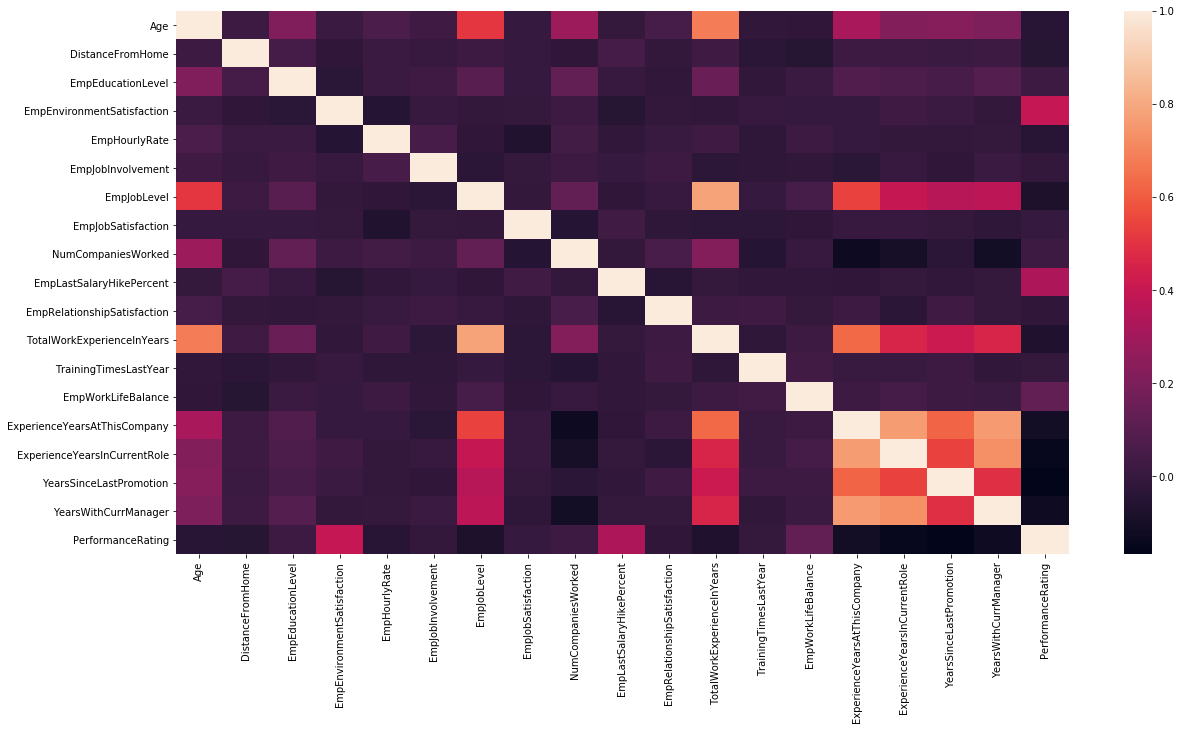

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

## Univariate Analysis

In [20]:
from pandas_profiling import ProfileReport
data_profile = ProfileReport(data)

In [21]:
data_profile

## Observations from above report1
1. no missing values
2. no duplicate rows
3. no outlier 
4. target variable consist of 2,3 and 4 

## From the above report we can infer that the EmpNumber has high cardinality , all entry in it are unique so removing it will not affect other elements

In [24]:
data.drop('EmpNumber',axis=1,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
EmpLastSalaryHikePercent        1200 non-null int64
Em

## Bivariate Analysis

## Data Visualization

## Import matplot and seaborn packages

In [26]:
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Grouping Department to find the performance rate in an order

In [27]:
for i, ep in enumerate (data.EmpDepartment):
    if ep=='Sales':
        data.loc[i,'Department']=1
    elif ep=='Human Resources':
        data.loc[i,'Department']=2
    elif ep=='Development':
        data.loc[i,'Department']=3
    elif ep=='Data Science':
        data.loc[i,'Department']=4
    elif ep=='Research & Development':
        data.loc[i,'Department']=5
    elif ep=='Finance':
        data.loc[i,'Department']=6
        
   

In [28]:
Dep_per=data.groupby('PerformanceRating').mean()['Department']

In [29]:
Dep_per

PerformanceRating
2    2.989691
3    3.040046
4    3.151515
Name: Department, dtype: float64

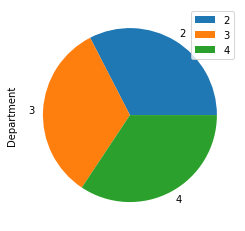

In [30]:
Dep_per.plot.pie()
plt.legend()

No handles with labels found to put in legend.


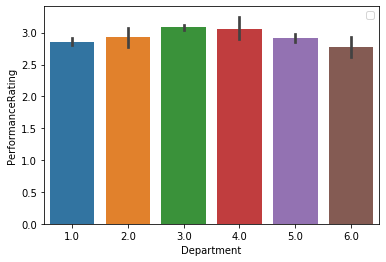

In [31]:
 sns.barplot(x="Department", y="PerformanceRating", data=data)
plt.legend()

Text(0.5, 1.0, 'Plot 1')

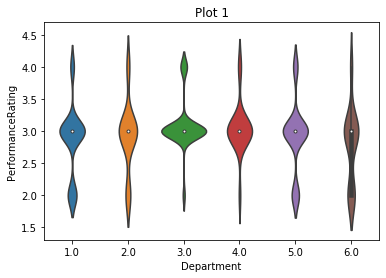

In [32]:
 sns.violinplot(x="Department", y="PerformanceRating", data=data).set_title('Plot 1')


## From the above graph, we can infer that distribution of outsanding and excellent performance of Employee department  wise as follows.
1. Development Department(3.0)
2. Datascience  Department(4.0)
3. Research and Development(5.0)
4. Sales(1.0)
5. Human Resources(2.0)
6. Finance(6.0)

## As Emp Environment Satisfaction correlates more, we check the relationship of EmpEnvSat with Performance Rating.

In [34]:
Rel_1=data.groupby('PerformanceRating').mean()['EmpEnvironmentSatisfaction']

In [33]:
Rel_1

PerformanceRating
2    1.582474
3    2.911899
4    3.083333
Name: EmpEnvironmentSatisfaction, dtype: float64

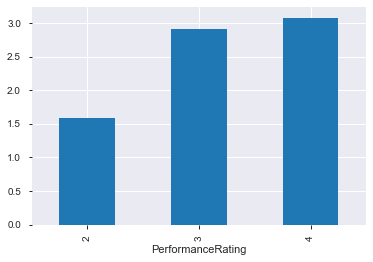

In [34]:
Rel_1.plot.bar()

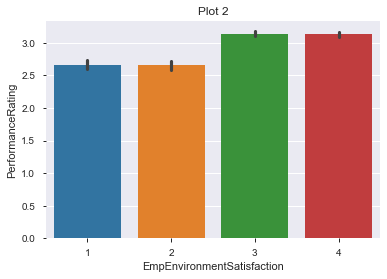

In [35]:
 Rel_2=sns.barplot(x="EmpEnvironmentSatisfaction", y="PerformanceRating", data=data).set_title('Plot 2')

In [36]:
## 1. From the above graph we can infer that employee who have high degree of satisfaction give out outstanding performance hence the feature is linear

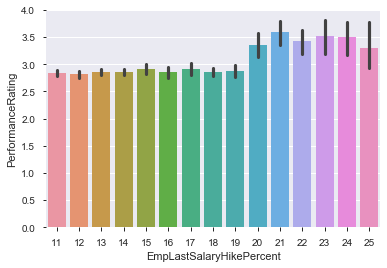

In [37]:
 Rel_2=sns.barplot(x="EmpLastSalaryHikePercent", y="PerformanceRating", data=data)

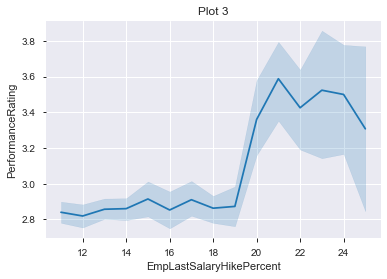

In [38]:
 Rel_new=sns.lineplot(x="EmpLastSalaryHikePercent", y="PerformanceRating", data=data).set_title('Plot 3')

In [39]:
## 2. Second highest correlation factor EmpLastSalaryHikePercent shows that if the emp has hike percent of more than 18 percent their performance were excellent and outstanding.

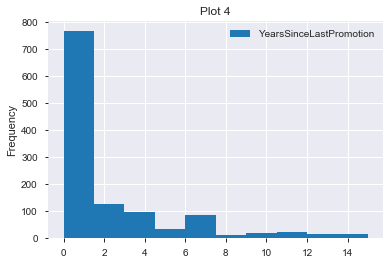

In [40]:
Rel_5=data.plot(kind='hist',stacked=True,x='PerformanceRating',y='YearsSinceLastPromotion').set_title('Plot 4')

## 3. The above graph depicts that if promotion has been awarded within 2 years those employee gets motivated more and perform well with high rating. On other case their performance were low

## Grouping of age because we have all range of age from 18 to 61

In [44]:
for i,x in enumerate (data.Age):
    if (x>17) & (x<25):
        data.loc[i,'age']=25
    elif (x>24) & (x<30):
        data.loc[i,'age']=30
    elif (x>29) & (x<35):
        data.loc[i,'age']=35 
    elif (x>34) & (x<40):
        data.loc[i,'age']=40
    elif (x>39) & (x<45):
        data.loc[i,'age']=45
    elif (x>44) & (x<50):
        data.loc[i,'age']=50
    elif (x>49) & (x<55):
        data.loc[i,'age']=55
    elif (x>54) & (x<61):
        data.loc[i,'age']=60

In [45]:
data['age'].astype(int)

0       35
1       50
2       45
3       45
4       60
5       30
6       55
7       30
8       40
9       40
10      45
11      50
12      35
13      30
14      45
15      35
16      40
17      60
18      45
19      30
20      30
21      55
22      40
23      35
24      35
25      55
26      35
27      30
28      50
29      25
        ..
1170    40
1171    45
1172    50
1173    45
1174    35
1175    30
1176    25
1177    45
1178    25
1179    35
1180    35
1181    35
1182    30
1183    40
1184    30
1185    40
1186    55
1187    40
1188    25
1189    35
1190    25
1191    30
1192    40
1193    30
1194    50
1195    30
1196    40
1197    55
1198    35
1199    25
Name: age, Length: 1200, dtype: int32

Text(0.5, 1.0, 'Plot 5')

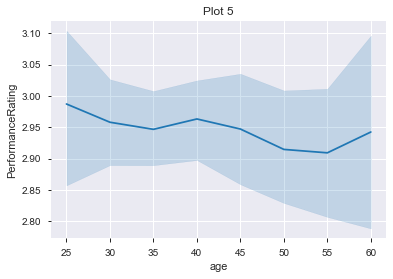

In [46]:
 sns.lineplot(x="age", y="PerformanceRating", data=data).set_title('Plot 5')

In [47]:
data['age'].astype(int)

0       35
1       50
2       45
3       45
4       60
5       30
6       55
7       30
8       40
9       40
10      45
11      50
12      35
13      30
14      45
15      35
16      40
17      60
18      45
19      30
20      30
21      55
22      40
23      35
24      35
25      55
26      35
27      30
28      50
29      25
        ..
1170    40
1171    45
1172    50
1173    45
1174    35
1175    30
1176    25
1177    45
1178    25
1179    35
1180    35
1181    35
1182    30
1183    40
1184    30
1185    40
1186    55
1187    40
1188    25
1189    35
1190    25
1191    30
1192    40
1193    30
1194    50
1195    30
1196    40
1197    55
1198    35
1199    25
Name: age, Length: 1200, dtype: int32

In [48]:
Counter(data.age)

Counter({35.0: 262,
         50.0: 117,
         45.0: 170,
         60.0: 52,
         30.0: 190,
         55.0: 88,
         40.0: 244,
         25.0: 77})

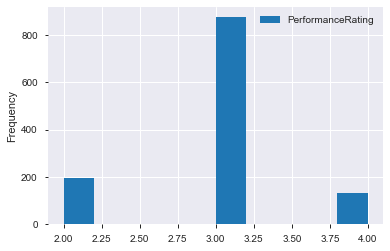

In [49]:
Rel_3new=data.plot(kind='hist',stacked=True,x='age',y='PerformanceRating')

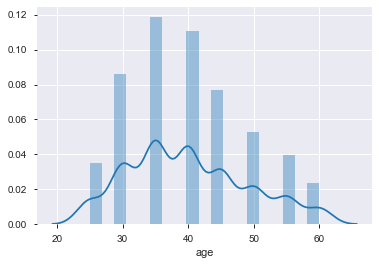

In [50]:
sns.distplot(data.age)

## 4. The above graphs show out the distribution of ages in the range of 18 to 60.We can infer that emp with the age range of 34 to 40 perform well.This shows that emp would have relavant exp with the work and also might have maturity and taking resposibility in completing their work.

In [52]:
for i,de in enumerate (data.MaritalStatus):
    if de=='Single':
        data.loc[i,'MaritalStatus_new']=1
    elif de=='Married':
        data.loc[i,'MaritalStatus_new']=2
    elif de=='Divorced':
        data.loc[i,'MaritalStatus_new']=3

Text(0.5, 1.0, 'Plot 6')

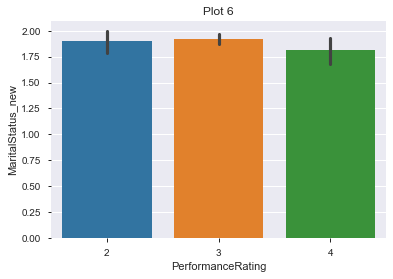

In [53]:
 sns.barplot(x="PerformanceRating", y="MaritalStatus_new", data=data).set_title('Plot 6')

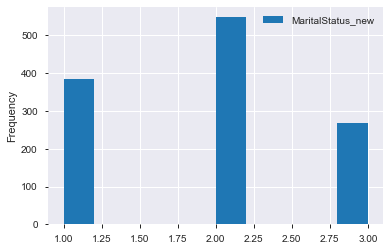

In [54]:
data.plot(kind='hist',stacked=True,x='PerformanceRating',y='MaritalStatus_new')

In [55]:
## 5. From the graph it is clear that emp who were married perform well

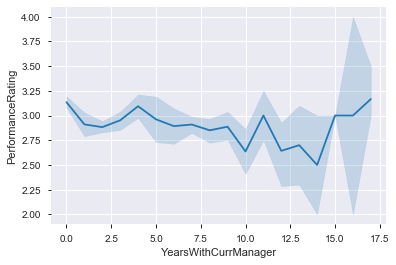

In [56]:

 sns.lineplot(x="YearsWithCurrManager", y="PerformanceRating", data=data)

## 6. Employee working under same manager for more than 8 years perform well.This case might be like manager would knew abt emp expertise well so he can allot project accordingly.Hence they perform well

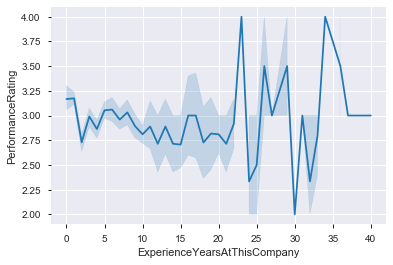

In [57]:
sns.lineplot(x='ExperienceYearsAtThisCompany', y="PerformanceRating", data=data)
    

## 7. Employee with more than 10yrs exp in same company perform well.This would be because they might be adopted to the environment.This factor is correlated more with EmpEnvironment Satisfaction

Text(0.5, 1.0, 'Plot 7')

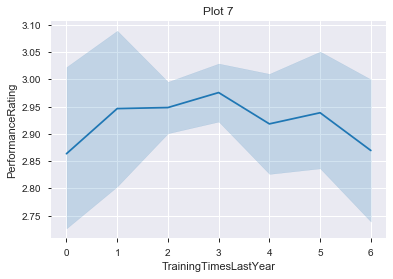

In [58]:

sns.lineplot(x='TrainingTimesLastYear', y="PerformanceRating", data=data).set_title('Plot 7')

## 8. Emp who have attended training for only 2 yrs perform well.If the training count is less and more than that their performance is low

In [59]:
years_exp=data.groupby('PerformanceRating').mean()[['TrainingTimesLastYear','ExperienceYearsAtThisCompany','TotalWorkExperienceInYears']]

In [60]:
years_exp

,TrainingTimesLastYear,ExperienceYearsAtThisCompany,TotalWorkExperienceInYears
PerformanceRating,,,
2,2.757732,9.097938,12.752577
3,2.803204,6.676201,11.076659
4,2.712121,6.765152,10.916667


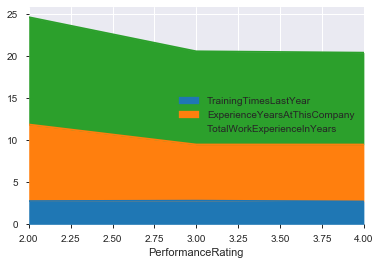

In [61]:
years_exp.plot.area()

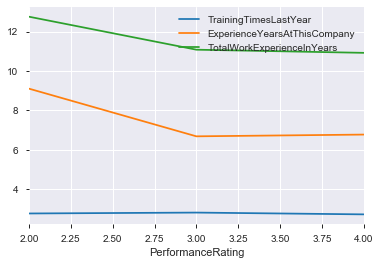

In [62]:
years_exp.plot.line()

## 9. Combined relation of emp training times,yrs at same company and total work exp shows that the mean of 2 times training, 6 yrs in same company & 10 yrs of total exp perform well with outstanding rate.

In [63]:
for i,st in enumerate (data.Attrition):
    if st=='Yes':
        data.loc[i,'Attrition_map']=1
    elif st=='No':
        data.loc[i,'Attrition_map']=2

Text(0.5, 1.0, 'Plot 8')

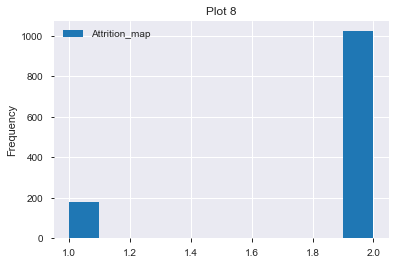

In [64]:

data.plot(kind='hist',stacked=True,x='PerformanceRating',y='Attrition_map').set_title('Plot 8')
    

## 10. Emp with stress in job perform little but the frquency is not more.So this would not affect the performance

In [65]:
for i, ga in enumerate (data.DistanceFromHome):
    if ga<=5:
        data.loc[i,'distancefromhome']=1.0
    elif (ga>5) & (ga<=10):
        data.loc[i,'distancefromhome']=2.0
    elif (ga>10) & (ga<=15):
        data.loc[i,'distancefromhome']=3.0
    elif (ga>15) & (ga<=20):
        data.loc[i,'distancefromhome']=4.0
    elif (ga>20) & (ga<=25):
        data.loc[i,'distancefromhome']=5.0
    elif (ga>25) & (ga<=30):
        data.loc[i,'distancefromhome']=6.0

In [66]:
Dist_home=data.groupby('PerformanceRating').mean()[['DistanceFromHome']]

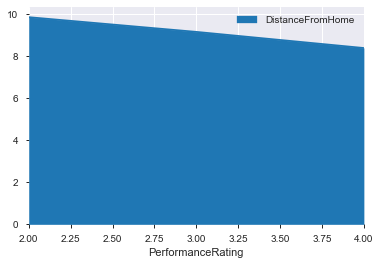

In [67]:
Dist_home.plot.area()

Text(0.5, 1.0, 'Plot 9')

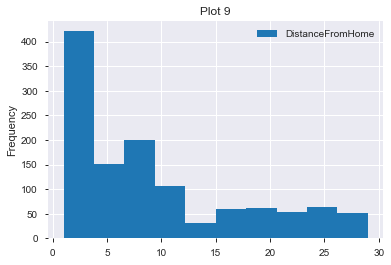

In [68]:
data.plot(kind='hist',stacked=True,x='PerformanceRating',y='DistanceFromHome').set_title('Plot 9')

## 11. Emp who stay very near i.e. less than 3km to company perform well.This is because they might feel fresh as they dont spend much time in travel.Hence they perform well

In [69]:

Hour_rate=data.groupby('PerformanceRating').mean()[['EmpHourlyRate']]

In [70]:
Hour_rate

,EmpHourlyRate
PerformanceRating,
2,68.216495
3,65.609840
4,65.159091


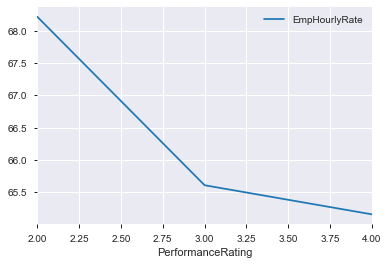

In [71]:
Hour_rate.plot.line()

## 12. Hourly rate of working doesnt effect much since all the emp will have to follow minimum login time of 9 hrs.Hence this would not affect the performance Rate

## Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

enc_Gen=LabelEncoder()
data.Gender=enc_Gen.fit_transform(data.Gender)

enc_EmpDep=LabelEncoder()
data.EmpDepartment=enc_EmpDep.fit_transform(data.EmpDepartment)

enc_Job=LabelEncoder()
data.EmpJobRole=enc_Job.fit_transform(data.EmpJobRole)


enc_Edn=LabelEncoder()
data.EducationBackground=enc_Edn.fit_transform(data.EducationBackground)


enc_Busintravel=LabelEncoder()
data.BusinessTravelFrequency=enc_Busintravel.fit_transform(data.BusinessTravelFrequency)

enc_Over=LabelEncoder()
data.OverTime=enc_Over.fit_transform(data.OverTime)


In [73]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Department,age,MaritalStatus_new,Attrition_map,distancefromhome
0,32,1,2,Single,5,13,2,10,3,4,...,7,0,8,No,3,1.0,35.0,1.0,2.0,2.0
1,47,1,2,Single,5,13,2,14,4,4,...,7,1,7,No,3,1.0,50.0,1.0,2.0,3.0
2,40,1,1,Married,5,13,1,5,4,4,...,13,1,12,No,4,1.0,45.0,2.0,2.0,1.0
3,41,1,0,Divorced,3,8,2,10,4,2,...,6,12,6,No,3,2.0,45.0,3.0,2.0,2.0
4,60,1,2,Single,5,13,2,16,4,1,...,2,2,2,No,3,1.0,60.0,1.0,2.0,4.0


## Parameters Considered to train the model where as follows based on relationship with target 

               1.EmpEnvironmentSatisfaction
               2.EmpLastSalaryHikePercent
               3.YearsSinceLastPromotion
               4.Age
               5.Gender
               6.MaritalStatus
               7.EmpDepartment
               8.EmpWorkLifeBalance
               9.TrainingTimesLastYear
             
             

In [74]:
X=data.loc[:,['Age',
              'Gender',
             'MaritalStatus_new',
             'EmpEnvironmentSatisfaction',
             'YearsSinceLastPromotion',
             'EmpLastSalaryHikePercent',
              'EmpDepartment',
              'TrainingTimesLastYear',
              'EmpWorkLifeBalance',
                          
             ]]
y=data.PerformanceRating

## Training the model

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.1)

## KNN Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Accuracy Score

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))


0.7833333333333333


### Crosstab

In [78]:
pd.crosstab(y_test, y_predict)

col_0,2,3,4
PerformanceRating,,,
2,7,11,0
3,5,86,0
4,4,6,1


### Classification Report

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.44      0.39      0.41        18
           3       0.83      0.95      0.89        91
           4       1.00      0.09      0.17        11

    accuracy                           0.78       120
   macro avg       0.76      0.47      0.49       120
weighted avg       0.79      0.78      0.75       120



## RandomForest Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=8,random_state=20,n_estimators=300,criterion='gini')

In [81]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

### Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.95

### Cross tab

In [83]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,16,2,0
3,3,88,0
4,0,1,10


### Classification Report

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.84      0.89      0.86        18
           3       0.97      0.97      0.97        91
           4       1.00      0.91      0.95        11

    accuracy                           0.95       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.95      0.95      0.95       120



## XG Boost

In [85]:
from xgboost import XGBClassifier
model= XGBClassifier(max_depth=3,n_estimators=30,random_state=30,learning_rate=0.001)

In [86]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

### Accuracy Score

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.95

### Classification Report

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.84      0.89      0.86        18
           3       0.97      0.97      0.97        91
           4       1.00      0.91      0.95        11

    accuracy                           0.95       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.95      0.95      0.95       120



## SVM Model

In [89]:
from sklearn.svm import SVC
model = SVC( kernel='rbf',
             C = 20,
             gamma = 0.0001,
             random_state=20
           )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Accuracy Score

In [90]:
accuracy_score(y_test, y_predict)

0.75

### Crosstab

In [91]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,0,18,0
3,0,88,3
4,3,6,2


### Classification Report

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        18
           3       0.79      0.97      0.87        91
           4       0.40      0.18      0.25        11

    accuracy                           0.75       120
   macro avg       0.40      0.38      0.37       120
weighted avg       0.63      0.75      0.68       120



## Conclusion

## Parameters that influence more to predict performance rate were as follows.
        1. EmpEnvironmentSatisfaction
        2. EmpHikePercent
        3. EmpSincelastPromotion
        
        